In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 4000
training_epochs = 100
nb_classes = 16
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_0dB_NoC_16.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:13]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data)

(160000, 12) (160000, 4)
[[-0.85328174  2.523594   -0.3251292  ... -0.8490139   0.5279481
  -0.062126  ]
 [ 0.32477725 -0.07251213 -0.53251463 ...  0.782513    0.16790222
   0.64390427]
 [ 1.7100152   0.2861635  -2.2307868  ... -0.02103099 -0.03288438
  -0.83219635]
 ...
 [-0.27884564  0.28490534 -0.9203678  ... -0.46545234 -1.4236597
  -0.8726425 ]
 [-1.2125674  -0.16606879  2.6673083  ... -0.88394314  0.5912549
   1.0459253 ]
 [ 1.7010192   0.36013976  1.2937485  ...  0.2049777   1.0520097
   0.45138365]]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=768, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=384, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=192, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['binary_accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               9984      
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               295296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               73920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                3

In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , epochs=training_epochs)

Epoch 1/100
40/40 [==============================] - 1s 5ms/step - loss: 2.9422 - binary_accuracy: 0.9378
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 2.0994 - binary_accuracy: 0.9409
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 1.8731 - binary_accuracy: 0.9431
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 1.7297 - binary_accuracy: 0.9453
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 1.6599 - binary_accuracy: 0.9460
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 1.6164 - binary_accuracy: 0.9467
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 1.5872 - binary_accuracy: 0.9470
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 1.5659 - binary_accuracy: 0.9473
Epoch 9/100
40/40 [==============================] - 0s 5ms/step - loss: 1.5484 - binary_accuracy: 0.9475
Epoch 10/100
40/40 [==========================

40/40 [==============================] - 0s 5ms/step - loss: 1.4115 - binary_accuracy: 0.9501
Epoch 78/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4127 - binary_accuracy: 0.9500
Epoch 79/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4073 - binary_accuracy: 0.9503
Epoch 80/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4073 - binary_accuracy: 0.9501
Epoch 81/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4118 - binary_accuracy: 0.9501
Epoch 82/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4122 - binary_accuracy: 0.9501
Epoch 83/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4082 - binary_accuracy: 0.9501
Epoch 84/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4073 - binary_accuracy: 0.9502
Epoch 85/100
40/40 [==============================] - 0s 5ms/step - loss: 1.4077 - binary_accuracy: 0.9502
Epoch 86/100
40/40 [==============================

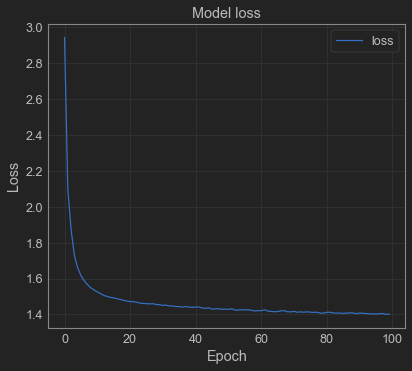

In [8]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
#plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

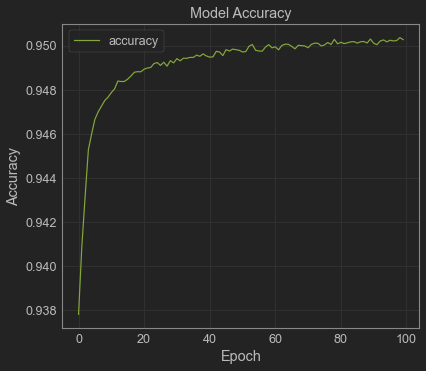

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['binary_accuracy'], 'g-', label='accuracy')
#plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_0dB_NoC_16_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:13]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(32000, 12) (32000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

1000/1000 [==============================] - 2s 2ms/step - loss: 1.3036 - binary_accuracy: 0.9536
loss:  1.3035682439804077
accuracy 0.9535507559776306


In [14]:
pre_error_cnt = 0
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
for p, y in zip(pred, y_test_bit.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    if p != int(y):
        pre_error_cnt += 1
print("Prediction Error Count : ", pre_error_cnt)

[False] Prediction: 10 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 7 True Y: 3
[False] Prediction: 7 True Y: 3
[False] Prediction: 2 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 15 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 10 True Y: 3
[False] Prediction: 6 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 11 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y: 3
[False] Prediction: 15 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 10 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction:

[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 14 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 8 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 10 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 10 True Y: 2
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 10 True Y: 2
[False] Prediction: 11 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2

[False] Prediction: 7 True Y: 6
[False] Prediction: 14 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 8 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 4 True Y: 6
[False] Prediction: 7 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 14 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 2 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 14 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 0 True Y: 6
[False] Prediction: 7 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 10 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 0 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 2 True Y: 6
[True] Prediction: 6 T

[True] Prediction: 0 True Y: 0
[False] Prediction: 12 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 8 True Y: 0
[False] Prediction: 8 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 9 True Y: 0
[False] Prediction: 12 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 10 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 Tru

[False] Prediction: 0 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[False] Prediction: 7 True Y: 4
[False] Prediction: 7 True Y: 4
[True] Prediction: 4 True Y: 4
[False] Prediction: 6 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[False] Prediction: 1 True Y: 4
[True] Prediction: 4 True Y: 4
[False] Prediction: 0 True Y: 4
[False] Prediction: 6 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[False] Prediction: 5 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[False] Prediction: 6 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[False] Prediction: 6 True Y: 4
[False] Prediction: 12 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y

[False] Prediction: 14 True Y: 11
[False] Prediction: 2 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 10 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 15 True Y: 11
[False] Prediction: 9 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 9 True Y: 11
[False] Prediction: 15 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 3 True Y: 11
[False] Prediction: 3 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 10 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 15 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 9 True Y: 11
[False] Prediction: 15 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 15 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 3 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 15 True Y: 11
[

[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 5 True Y: 15
[False] Prediction: 11 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 7 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 14 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 3 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 6 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 1 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 11 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 9 True Y: 15
[False] Prediction: 3 True Y: 15
[False] Prediction: 9 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False]

[False] Prediction: 11 True Y: 9
[False] Prediction: 13 True Y: 9
[False] Prediction: 11 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 0 True Y: 9
[False] Prediction: 1 True Y: 9
[False] Prediction: 8 True Y: 9
[False] Prediction: 8 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 8 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 8 True Y: 9
[False] Prediction: 13 True Y: 9
[False] Prediction: 8 True Y: 9
[False] Prediction: 1 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 8 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 3 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 1 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 

[True] Prediction: 13 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 15 True Y: 13
[False] Prediction: 15 True Y: 13
[False] Prediction: 9 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 1 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 5 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 9 True Y: 13
[False] Prediction: 9 True Y: 13
[False] Prediction: 11 True Y: 13
[True] Prediction: 13 True Y: 13
[True] Prediction: 13 True Y: 13
[True] Prediction: 13 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 12 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 15 True Y: 13
[True] Prediction: 13 True Y: 13
[True] Prediction: 13 True Y: 13
[True] Prediction: 13 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 1 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 5 True Y: 13
[True] Prediction: 13 True Y: 13
[False] Prediction: 15 True Y: 13
[True] Prediction: 13 True Y: 13
[Fal

In [15]:
print(y_test_data.shape[0]/16)

2000.0


In [16]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        #print("False : {}".format(i))
        #print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                #print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                #print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

Error : 13834
Error Count: 20199


In [17]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.1578046875
